# Part 1.5 | Panel Data (Wide Format)

Figure generation notebook for reshaping diagrams (w_01 through w_06)

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec

plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'font.style': 'italic',
    'figure.dpi': 400
})

category_color_pal = sns.color_palette('hls', 8)

In [2]:
# Load data
percap = pd.read_csv('data/Coffee_Per_Cap.csv', index_col=0)

# Select a subset of countries and years for cleaner visuals
countries = ['USA', 'DEU', 'JPN', 'GBR', 'FRA']
years = ['1999', '2004', '2009', '2014', '2019']
subset = percap[percap['Code'].isin(countries)][['Code'] + years].reset_index(drop=True)
subset

,Code,1999,2004,2009,2014,2019
0,FRA,5.531497,4.715520,5.263721,5.387255,5.513148
1,DEU,7.123974,7.594867,6.517765,6.432501,6.260458
2,JPN,2.972258,3.342335,3.340961,3.532795,3.577740
3,GBR,2.327101,2.458496,3.102305,2.719408,3.384387
4,USA,4.162629,4.297668,4.192566,4.478898,4.990711


## Figure i_00: All-country line plot (motivation for wide format)

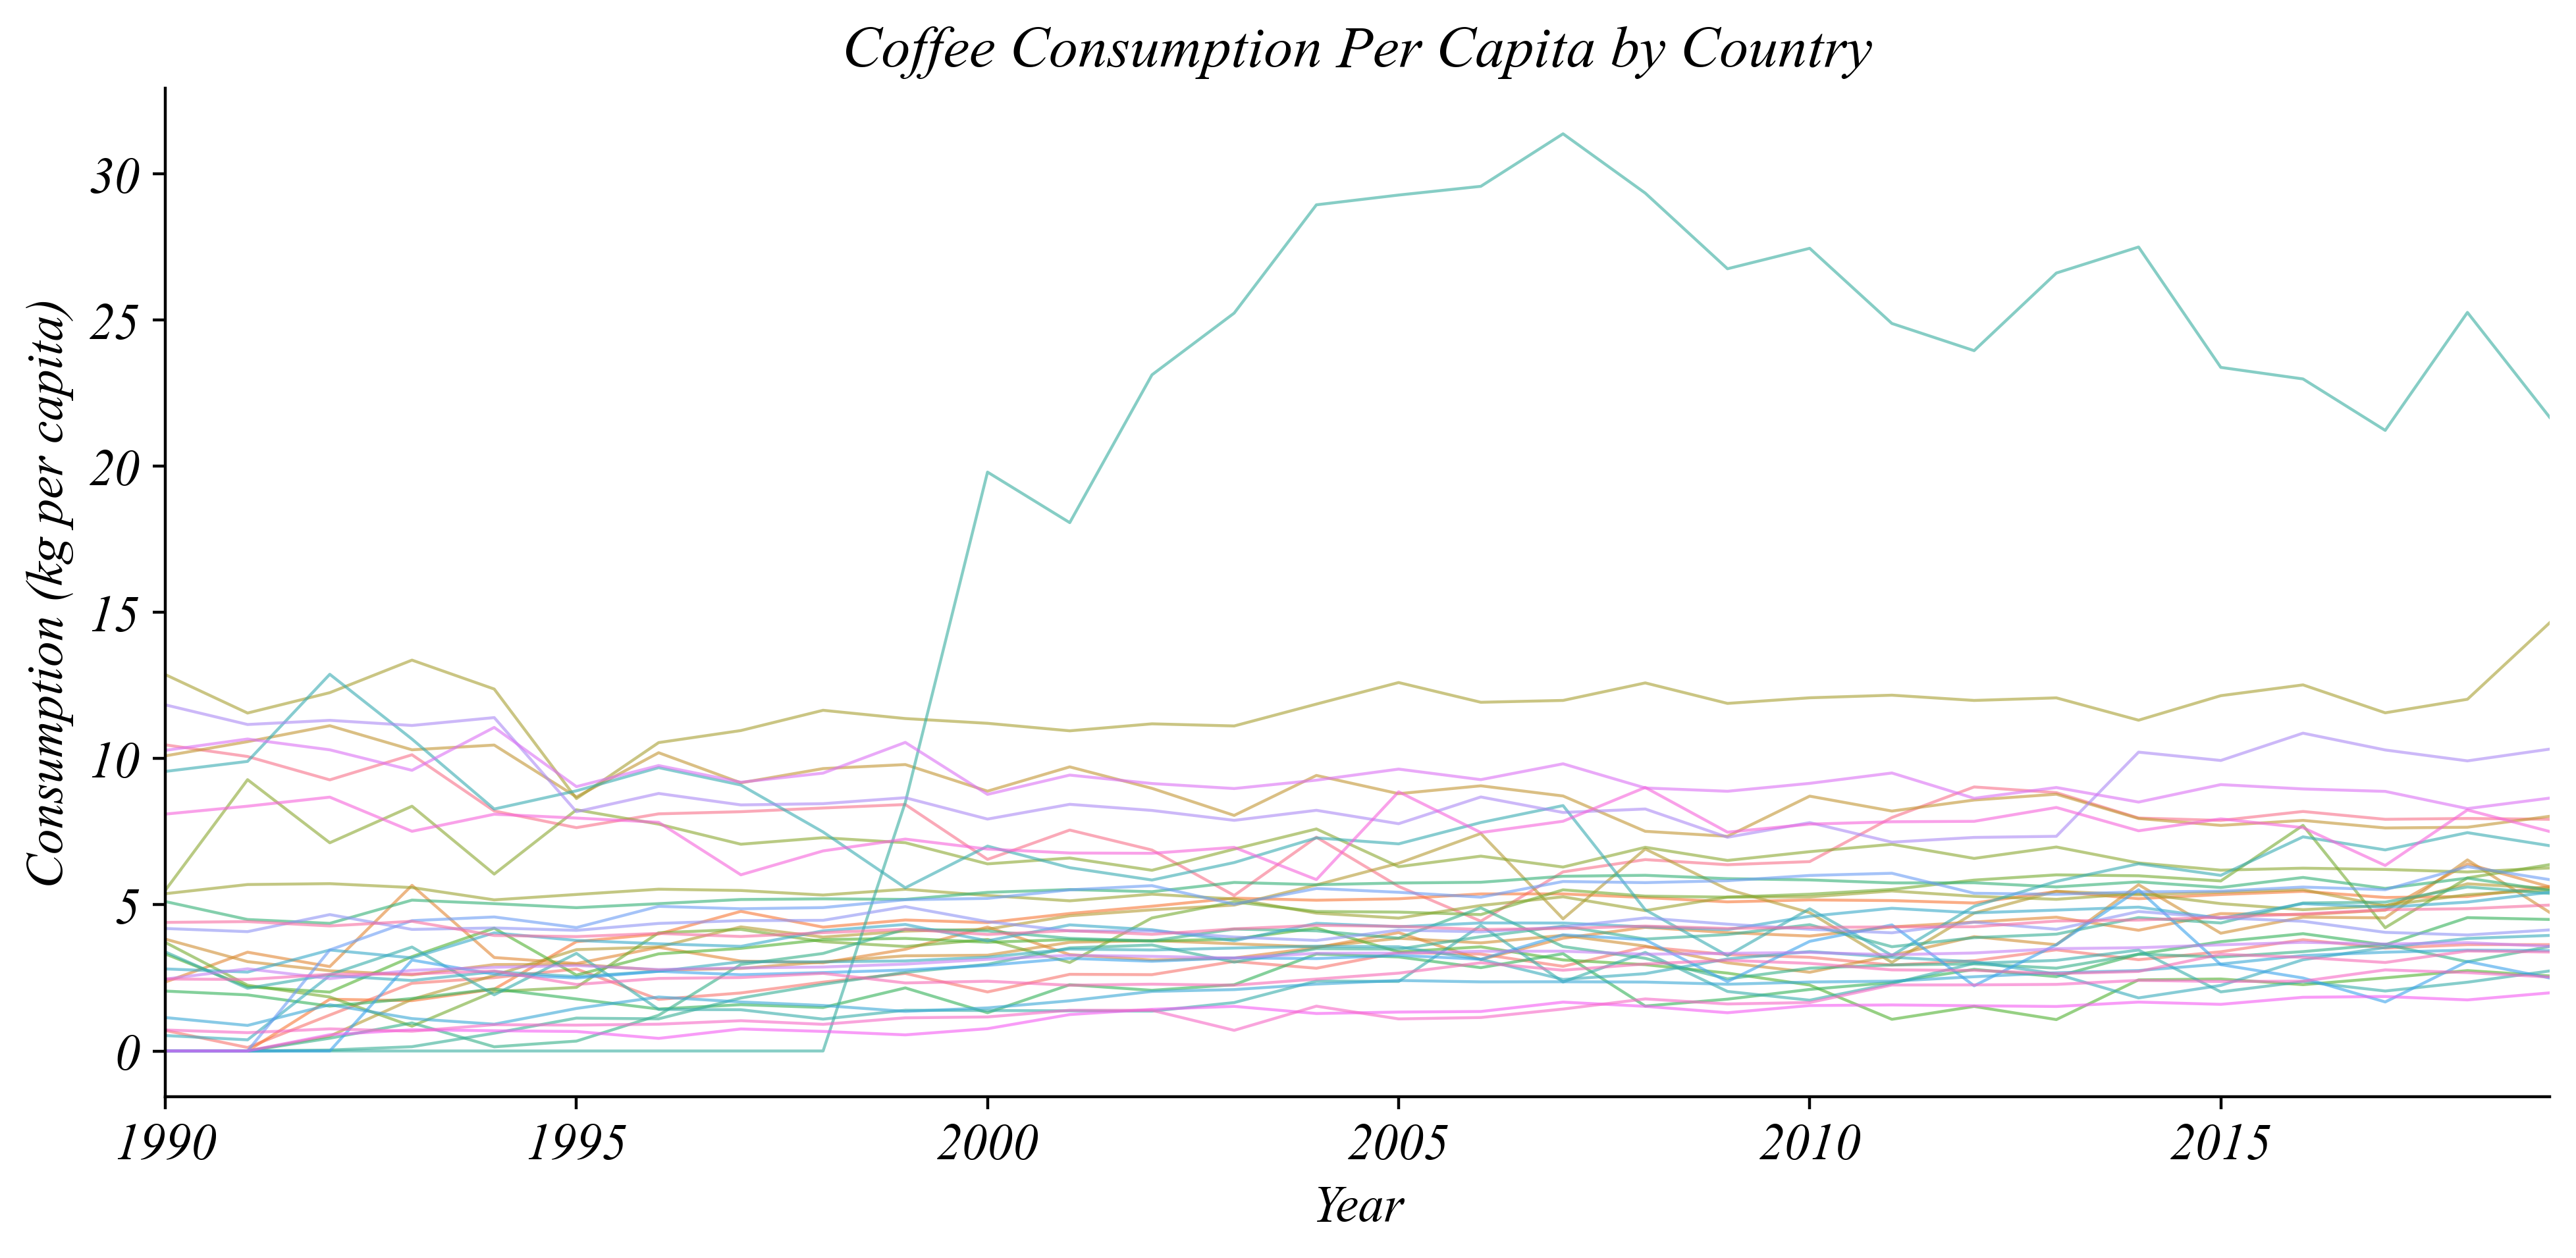

In [4]:
# Figure i_00: All-country multi-line plot
# Melt all countries to long format
year_cols = [str(y) for y in range(1990, 2020)]
all_long = percap[['Code'] + year_cols].melt(
    id_vars='Code', var_name='Year', value_name='Consumption'
)
all_long['Year'] = all_long['Year'].astype(int)

plt.figure(figsize=(10, 5))
sns.lineplot(data=all_long, x='Year', y='Consumption', hue='Code', linewidth=0.8, alpha=0.6, legend=False)

plt.xlabel('Year')
plt.xlim(1990,2019)
plt.ylabel('Consumption (kg per capita)')
plt.title('Coffee Consumption Per Capita by Country')
sns.despine()
plt.tight_layout()
plt.savefig('i/i_00.png', bbox_inches='tight')

## Figure w_01: Wide Format Table

In [ ]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('off')

table_data = [['Code'] + years]
for _, row in subset.iterrows():
    table_data.append([row['Code']] + [f"{row[y]:.1f}" for y in years])

table = ax.table(cellText=table_data, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.8)

for j in range(len(years) + 1):
    table[(0, j)].set_facecolor('#4472C4')
    table[(0, j)].set_text_props(color='white', weight='bold')

plt.title('Wide Format: Coffee Consumption (kg per capita)', fontsize=14, pad=20)
plt.tight_layout()
plt.savefig('i/w_01.png', bbox_inches='tight', facecolor='white')

## Figure w_02: Long Format Table

In [ ]:
# Melt to long format
long_df = subset.melt(id_vars=['Code'], var_name='Year', value_name='Consumption')
long_sample = long_df.head(12)

fig, ax = plt.subplots(figsize=(6, 5))
ax.axis('off')

table_data = [['Code', 'Year', 'Consumption']]
for _, row in long_sample.iterrows():
    table_data.append([row['Code'], row['Year'], f"{row['Consumption']:.1f}"])

table = ax.table(cellText=table_data, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.6)

for j in range(3):
    table[(0, j)].set_facecolor('#4472C4')
    table[(0, j)].set_text_props(color='white', weight='bold')

plt.title('Long Format: Coffee Consumption', fontsize=14, pad=20)
plt.tight_layout()
plt.savefig('i/w_02.png', bbox_inches='tight', facecolor='white')

## Figure w_03: Melt Operation Diagram

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4), gridspec_kw={'width_ratios': [3, 1, 2.5]})

# Left: Wide format
ax = axes[0]
ax.axis('off')
small_wide = subset.head(3)[['Code', '1999', '2019']]
table_data = [['Code', '1999', '2019']]
for _, row in small_wide.iterrows():
    table_data.append([row['Code'], f"{row['1999']:.1f}", f"{row['2019']:.1f}"])

table = ax.table(cellText=table_data, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 1.8)
for j in range(3):
    table[(0, j)].set_facecolor('#4472C4')
    table[(0, j)].set_text_props(color='white', weight='bold')
ax.set_title('Wide Format', fontsize=12, pad=10)

# Middle: Arrow
ax = axes[1]
ax.axis('off')
ax.annotate('', xy=(0.9, 0.5), xytext=(0.1, 0.5),
            arrowprops=dict(arrowstyle='->', color='#4472C4', lw=3))
ax.text(0.5, 0.65, 'melt()', ha='center', va='bottom', fontsize=14, style='italic', color='#4472C4')

# Right: Long format
ax = axes[2]
ax.axis('off')
small_long = small_wide.melt(id_vars=['Code'], var_name='Year', value_name='Consumption')
table_data = [['Code', 'Year', 'Consumption']]
for _, row in small_long.iterrows():
    table_data.append([row['Code'], row['Year'], f"{row['Consumption']:.1f}"])

table = ax.table(cellText=table_data, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.1, 1.5)
for j in range(3):
    table[(0, j)].set_facecolor('#4472C4')
    table[(0, j)].set_text_props(color='white', weight='bold')
ax.set_title('Long Format', fontsize=12, pad=10)

plt.suptitle('Melting: Wide → Long', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('i/w_03.png', bbox_inches='tight', facecolor='white')

# Full melt for line plot - only melt year columns
year_cols = [str(y) for y in range(1990, 2020)]
full_long = percap[percap['Code'].isin(['USA', 'DEU', 'JPN'])][['Code'] + year_cols].melt(
    id_vars=['Code'], var_name='Year', value_name='Consumption'
)
full_long['Year'] = full_long['Year'].astype(int)

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=full_long, x='Year', y='Consumption', hue='Code',
             palette=category_color_pal[:3], linewidth=2, ax=ax)

plt.title('Coffee Consumption Over Time (from Long Format)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Consumption (kg per capita)')
plt.legend(title='Country')
sns.despine()
plt.tight_layout()
plt.savefig('i/w_04.png', bbox_inches='tight')

In [ ]:
# Full melt for line plot
full_long = percap[percap['Code'].isin(['USA', 'DEU', 'JPN'])].melt(
    id_vars=['Code'], var_name='Year', value_name='Consumption'
)
full_long['Year'] = full_long['Year'].astype(int)

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=full_long, x='Year', y='Consumption', hue='Code',
             palette=category_color_pal[:3], linewidth=2, ax=ax)

plt.title('Coffee Consumption Over Time (from Long Format)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Consumption (kg per capita)')
plt.legend(title='Country')
sns.despine()
plt.tight_layout()
plt.savefig('i/w_04.png', bbox_inches='tight')

## Figure w_05: Pivot Operation Diagram

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4), gridspec_kw={'width_ratios': [2.5, 1, 3]})

# Left: Long format
ax = axes[0]
ax.axis('off')
small_wide = subset.head(3)[['Code', '1999', '2019']]
small_long = small_wide.melt(id_vars=['Code'], var_name='Year', value_name='Consumption')
table_data = [['Code', 'Year', 'Consumption']]
for _, row in small_long.iterrows():
    table_data.append([row['Code'], row['Year'], f"{row['Consumption']:.1f}"])

table = ax.table(cellText=table_data, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.1, 1.5)
for j in range(3):
    table[(0, j)].set_facecolor('#4472C4')
    table[(0, j)].set_text_props(color='white', weight='bold')
ax.set_title('Long Format', fontsize=12, pad=10)

# Middle: Arrow
ax = axes[1]
ax.axis('off')
ax.annotate('', xy=(0.9, 0.5), xytext=(0.1, 0.5),
            arrowprops=dict(arrowstyle='->', color='#4472C4', lw=3))
ax.text(0.5, 0.65, 'pivot()', ha='center', va='bottom', fontsize=14, style='italic', color='#4472C4')

# Right: Wide format
ax = axes[2]
ax.axis('off')
table_data = [['Code', '1999', '2019']]
for _, row in small_wide.iterrows():
    table_data.append([row['Code'], f"{row['1999']:.1f}", f"{row['2019']:.1f}"])

table = ax.table(cellText=table_data, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 1.8)
for j in range(3):
    table[(0, j)].set_facecolor('#4472C4')
    table[(0, j)].set_text_props(color='white', weight='bold')
ax.set_title('Wide Format', fontsize=12, pad=10)

plt.suptitle('Pivoting: Long → Wide', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('i/w_05.png', bbox_inches='tight', facecolor='white')

## Figure w_06: Scatterplot from Wide Format

In [ ]:
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
ax = fig.add_subplot(gs[0, 1])

sns.scatterplot(data=percap, x='1999', y='2019', color='grey', edgecolors='#4472C4', alpha=0.5, s=100, ax=ax)
ax.plot([0, 20], [0, 20], linestyle='--', color='red', alpha=0.5, zorder=-1)

ax.set_xlabel('Consumption in 1999 (kg per capita)')
ax.set_ylabel('Consumption in 2019 (kg per capita)')
ax.set_title('Comparing Years (from Wide Format)', fontsize=14)
ax.set_xlim(0, 20)
ax.set_ylim(0, 20)
ax.grid(True, color='lightgray', linestyle='--', linewidth=0.4)

plt.tight_layout()
plt.savefig('i/w_06.png', bbox_inches='tight')

## Per Capita Transformation Figures

In [ ]:
# Load GDP and Population data
gdp_pop = pd.read_csv('data/GDP_Population_2019.csv')
gdp_pop['GDP_per_capita'] = gdp_pop['GDP'] * 1e12 / (gdp_pop['Population'] * 1e6)
gdp_pop = gdp_pop.sort_values('GDP', ascending=False)
gdp_pop.head(10)

In [ ]:
# Figure i_01: Total GDP by country (top 15)
gdp_sorted = gdp_pop.sort_values('GDP', ascending=True).tail(15)

plt.figure(figsize=(10, 5))
plt.barh(gdp_sorted['Country'], gdp_sorted['GDP'], color='C0')

plt.xlabel('GDP (trillion $)')
plt.ylabel('')
plt.title('Total GDP by Country (2019)')

sns.despine(trim=True)
plt.tight_layout()
plt.savefig('i/i_01.png')

In [ ]:
# Figure i_02: GDP per capita by country (top 15)
gdp_pc_sorted = gdp_pop.sort_values('GDP_per_capita', ascending=True).tail(15)

plt.figure(figsize=(10, 5))
plt.barh(gdp_pc_sorted['Country'], gdp_pc_sorted['GDP_per_capita']/1000, color='C0')

plt.xlabel('GDP per Capita (thousand $)')
plt.ylabel('')
plt.title('GDP per Capita by Country (2019)')

sns.despine(trim=True)
plt.tight_layout()
plt.savefig('i/i_02.png')

## Multi-Boxplot Figures

In [ ]:
# Figure i_03: Coffee histogram 1999
bin_edges = np.arange(0, 25, 1)

plt.figure(figsize=(10, 4))
plt.hist(percap['1999'], bins=bin_edges, edgecolor='black', label='1999', alpha=1/2)

plt.title('Coffee Importing Countries (1999)')
plt.ylabel('')
plt.xlabel('Coffee Consumption (1kg per capita)')
plt.xlim(0, 25)
plt.yticks([])
plt.grid(False)
sns.despine(left=True, right=True, top=True)
plt.tight_layout()
plt.savefig('i/i_03.png')

In [ ]:
# Figure i_04: Coffee histogram 1999 and 2019
bin_edges = np.arange(0, 25, 1)

plt.figure(figsize=(10, 4))
plt.hist(percap['1999'], bins=bin_edges, edgecolor='black', label='1999', alpha=1/2)
plt.hist(percap['2019'], bins=bin_edges, edgecolor='black', label='2019', alpha=1/2)

plt.title('Coffee Importing Countries')
plt.ylabel('')
plt.xlabel('Coffee Consumption (1kg per capita)')
plt.xlim(0, 25)
plt.yticks([])
plt.grid(False)
sns.despine(left=True, right=True, top=True)
plt.legend()
plt.tight_layout()
plt.savefig('i/i_04.png')

In [ ]:
# Figure i_05: Two-year boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(percap[['1999','2019']], orient='h', color='lightgrey', whis=(0, 100))
sns.stripplot(percap[['1999','2019']], orient='h')

plt.title('Coffee Importing Countries')
plt.ylabel('')
plt.xlabel('Coffee Consumption (1kg per capita)')
plt.grid(False)
sns.despine(left=False, right=True, top=True, trim=True)
plt.tight_layout()
plt.savefig('i/i_05.png')

In [ ]:
# Figure i_06_c: Five-year boxplot with color
plt.figure(figsize=(10, 4))
sns.boxplot(percap[['1999','2004','2009','2014','2019']], orient='h', color='lightgrey', whis=(0, 100))
sns.stripplot(percap[['1999','2004','2009','2014','2019']], orient='h', palette=category_color_pal[:5], alpha=0.2)

plt.title('Coffee Importing Countries')
plt.xlabel('Coffee Consumption (1kg per capita)')
plt.ylabel('')
plt.ylim(-0.5, 4.5)
sns.despine(left=False, top=True, bottom=False, trim=True)
plt.tight_layout()
plt.savefig('i/i_06_c.png')

In [ ]:
# Figure i_06: Five-year boxplot plain
plt.figure(figsize=(10, 4))
sns.boxplot(percap[['1999','2004','2009','2014','2019']], orient='h', color='lightgrey', whis=(0, 100))

plt.title('Coffee Importing Countries')
plt.xlabel('Coffee Consumption (1kg per capita)')
plt.ylabel('')
plt.ylim(-0.5, 4.5)
sns.despine(left=False, top=True, bottom=False, trim=True)
plt.tight_layout()
plt.savefig('i/i_06.png')

In [ ]:
# Figure i_07: Medians highlighted
years = ['1999','2004','2009','2014','2019']

plt.figure(figsize=(10, 4))
sns.boxplot(percap[years], orient='h', color='lightgrey', whis=(0, 100))

for i, year in enumerate(years):
    quant = percap[year].median()
    plt.plot([quant, quant], [i - 0.4, i + 0.4], color='red', linewidth=1, zorder=4)

plt.title('Coffee Importing Countries')
plt.xlabel('Coffee Consumption (1kg per capita)')
plt.ylabel('')
plt.ylim(-0.5, 4.5)
sns.despine(left=False, top=True, bottom=False, trim=True)
plt.grid(True)
plt.tight_layout()
plt.savefig('i/i_07.png')

In [ ]:
# Figure i_08: 2009-2014 highlighted
years = ['1999','2004','2009','2014','2019']

plt.figure(figsize=(10, 4))
sns.boxplot(percap[years], orient='h', color='lightgrey', whis=(0, 100))
sns.boxplot(data=percap[['2009','2014']], orient='h', color='#2196F3', whis=(0, 100))

for i, year in enumerate(years):
    quant = percap[year].median()
    plt.plot([quant, quant], [i - 0.4, i + 0.4], color='red', linewidth=1, zorder=4)

plt.title('Coffee Importing Countries')
plt.xlabel('Coffee Consumption (1kg per capita)')
plt.ylabel('')
plt.ylim(-0.5, 4.5)
sns.despine(left=False, top=True, bottom=False, trim=True)
plt.grid(True)
plt.tight_layout()
plt.savefig('i/i_08.png')

In [ ]:
# Figure i_09: Minimums highlighted
years = ['1999','2004','2009','2014','2019']

plt.figure(figsize=(10, 4))
sns.boxplot(percap[years], orient='h', color='lightgrey', whis=(0, 100))

for i, year in enumerate(years):
    quant = percap[year].min()
    plt.plot([quant, quant], [i - 0.4, i + 0.4], color='red', linewidth=1, zorder=4)

plt.title('Coffee Importing Countries')
plt.xlabel('Coffee Consumption (1kg per capita)')
plt.ylabel('')
plt.ylim(-0.5, 4.5)
sns.despine(left=False, top=True, bottom=False, trim=True)
plt.tight_layout()
plt.savefig('i/i_09.png')

In [ ]:
# Figure i_10: Maximums highlighted
years = ['1999','2004','2009','2014','2019']

plt.figure(figsize=(10, 4))
sns.boxplot(percap[years], orient='h', color='lightgrey', whis=(0, 100))

for i, year in enumerate(years):
    quant = percap[year].max()
    plt.plot([quant, quant], [i - 0.4, i + 0.4], color='red', linewidth=1, zorder=4)

plt.title('Coffee Importing Countries')
plt.xlabel('Coffee Consumption (1kg per capita)')
plt.ylabel('')
plt.ylim(-0.5, 4.5)
sns.despine(left=False, top=True, bottom=False, trim=True)
plt.tight_layout()
plt.savefig('i/i_10.png')

In [ ]:
# Figure i_11: 1999-2009 highlighted
years = ['1999','2004','2009','2014','2019']

plt.figure(figsize=(10, 4))
sns.boxplot(percap[years], orient='h', color='lightgrey', whis=(0, 100))
sns.boxplot(data=percap[['1999','2004','2009']], orient='h', color='#2196F3', whis=(0, 100))

for i, year in enumerate(years):
    quant = percap[year].median()
    plt.plot([quant, quant], [i - 0.4, i + 0.4], color='red', linewidth=1, zorder=4)

plt.title('Coffee Importing Countries')
plt.xlabel('Coffee Consumption (1kg per capita)')
plt.ylabel('')
plt.ylim(-0.5, 4.5)
sns.despine(left=False, top=True, bottom=False, trim=True)
plt.grid(True)
plt.tight_layout()
plt.savefig('i/i_11.png')

In [ ]:
# Figure i_12: Q1 highlighted
years = ['1999','2004','2009','2014','2019']

plt.figure(figsize=(10, 4))
sns.boxplot(percap[years], orient='h', color='lightgrey', whis=(0, 100))

for i, year in enumerate(years):
    quant = percap[year].quantile(0.25)
    plt.plot([quant, quant], [i - 0.4, i + 0.4], color='red', linewidth=1, zorder=4)

plt.title('Coffee Importing Countries')
plt.xlabel('Coffee Consumption (1kg per capita)')
plt.ylabel('')
plt.ylim(-0.5, 4.5)
sns.despine(left=False, top=True, bottom=False, trim=True)
plt.grid(True)
plt.tight_layout()
plt.savefig('i/i_12.png')

In [ ]:
# Figure i_13: All years highlighted with Q1
years = ['1999','2004','2009','2014','2019']

plt.figure(figsize=(10, 4))
sns.boxplot(percap[years], orient='h', color='lightgrey', whis=(0, 100))
sns.boxplot(percap[years], orient='h', color='#2196F3', whis=(0, 100))

for i, year in enumerate(years):
    quant = percap[year].quantile(0.25)
    plt.plot([quant, quant], [i - 0.4, i + 0.4], color='red', linewidth=1, zorder=4)

plt.title('Coffee Importing Countries')
plt.xlabel('Coffee Consumption (1kg per capita)')
plt.ylabel('')
plt.ylim(-0.5, 4.5)
sns.despine(left=False, top=True, bottom=False, trim=True)
plt.grid(True)
plt.tight_layout()
plt.savefig('i/i_13.png')

In [ ]:
# Figure i_14: Range highlighted
years = ['1999','2004','2009','2014','2019']

plt.figure(figsize=(10, 4))
sns.boxplot(percap[years], orient='h', color='lightgrey', whis=(0, 100))

for i, year in enumerate(years):
    min_val = percap[year].min()
    max_val = percap[year].max()
    plt.plot([min_val, max_val], [i, i], color='red', linewidth=1)

plt.title('Coffee Importing Countries')
plt.xlabel('Coffee Consumption (1kg per capita)')
plt.ylabel('')
plt.ylim(-0.5, 4.5)
sns.despine(left=False, top=True, bottom=False, trim=True)
plt.tight_layout()
plt.savefig('i/i_14.png')

In [ ]:
# Figure i_15: 2004 highlighted with range
years = ['1999','2004','2009','2014','2019']

plt.figure(figsize=(10, 4))
sns.boxplot(percap[years], orient='h', color='lightgrey', whis=(0, 100))
sns.boxplot(data=percap[['2004']], orient='h', color='#2196F3', whis=(0, 100))

for i, year in enumerate(years):
    min_val = percap[year].min()
    max_val = percap[year].max()
    plt.plot([min_val, max_val], [i, i], color='red', linewidth=1)

plt.title('Coffee Importing Countries')
plt.xlabel('Coffee Consumption (1kg per capita)')
plt.ylabel('')
plt.ylim(-0.5, 4.5)
sns.despine(left=False, top=True, bottom=False, trim=True)
plt.tight_layout()
plt.savefig('i/i_15.png')

## Scatterplot Figures

In [ ]:
# Figure i_16: Basic scatterplot
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

sns.scatterplot(percap, x='1999', y='2019', color='grey', edgecolors='red', alpha=0.3, s=150)

tick_labels = [0, 4, 8, 12, 16, 20, 24]
plt.xlabel('Consumption in 1999 (1kg per cap)')
plt.xticks(ticks=tick_labels, labels=tick_labels)
plt.xlim(0, 24)
plt.ylabel('Consumption in 2019 (1kg per cap)')
plt.yticks(ticks=tick_labels, labels=tick_labels)
plt.ylim(0, 24)
plt.title('Coffee Importing Countries')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()
plt.savefig('i/i_16.png')

In [ ]:
# Figure i_17: With 45-degree line
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

sns.scatterplot(percap, x='1999', y='2019', color='grey', edgecolors='red', alpha=0.3, s=150)
plt.plot([0, 24], [0, 24], linestyle='--', color='red', zorder=-1, alpha=0.5)

tick_labels = [0, 4, 8, 12, 16, 20, 24]
plt.xlabel('Consumption in 1999 (1kg per cap)')
plt.xticks(ticks=tick_labels, labels=tick_labels)
plt.xlim(0, 24)
plt.ylabel('Consumption in 2019 (1kg per cap)')
plt.yticks(ticks=tick_labels, labels=tick_labels)
plt.ylim(0, 24)
plt.title('Coffee Importing Countries')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()
plt.savefig('i/i_17.png')

In [ ]:
# Figure i_18: Increases highlighted
increase = percap[percap['1999'] <= percap['2019']]
decrease = percap[percap['1999'] > percap['2019']]

fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

plt.scatter(increase['1999'], increase['2019'], color='red', edgecolors='grey', alpha=0.3, s=150)
plt.scatter(decrease['1999'], decrease['2019'], color='white', edgecolors='grey', alpha=0.3, s=150)
plt.plot([0, 24], [0, 24], linestyle='--', color='red', zorder=-1, alpha=0.5)

tick_labels = [0, 4, 8, 12, 16, 20, 24]
plt.xlabel('Consumption in 1999 (1kg per cap)')
plt.xticks(ticks=tick_labels, labels=tick_labels)
plt.xlim(0, 24)
plt.ylabel('Consumption in 2019 (1kg per cap)')
plt.yticks(ticks=tick_labels, labels=tick_labels)
plt.ylim(0, 24)
plt.title('Coffee Importing Countries')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()
plt.savefig('i/i_18.png')

In [ ]:
# Figure i_19: Decreases highlighted
increase = percap[percap['1999'] <= percap['2019']]
decrease = percap[percap['1999'] > percap['2019']]

fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

plt.scatter(decrease['1999'], decrease['2019'], color='red', edgecolors='grey', alpha=0.3, s=150)
plt.scatter(increase['1999'], increase['2019'], color='white', edgecolors='grey', alpha=0.3, s=150)
plt.plot([0, 24], [0, 24], linestyle='--', color='red', zorder=-1, alpha=0.5)

tick_labels = [0, 4, 8, 12, 16, 20, 24]
plt.xlabel('Consumption in 1999 (1kg per cap)')
plt.xticks(ticks=tick_labels, labels=tick_labels)
plt.xlim(0, 24)
plt.ylabel('Consumption in 2019 (1kg per cap)')
plt.yticks(ticks=tick_labels, labels=tick_labels)
plt.ylim(0, 24)
plt.title('Coffee Importing Countries')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()
plt.savefig('i/i_19.png')

In [ ]:
# Figure i_20: Both increases (red) and decreases (green)
increase = percap[percap['1999'] <= percap['2019']]
decrease = percap[percap['1999'] > percap['2019']]

fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

plt.scatter(decrease['1999'], decrease['2019'], color='green', edgecolors='grey', alpha=0.3, s=150)
plt.scatter(increase['1999'], increase['2019'], color='red', edgecolors='grey', alpha=0.3, s=150)
plt.plot([0, 24], [0, 24], linestyle='--', color='red', zorder=-1, alpha=0.5)

tick_labels = [0, 4, 8, 12, 16, 20, 24]
plt.xlabel('Consumption in 1999 (1kg per cap)')
plt.xticks(ticks=tick_labels, labels=tick_labels)
plt.xlim(0, 24)
plt.ylabel('Consumption in 2019 (1kg per cap)')
plt.yticks(ticks=tick_labels, labels=tick_labels)
plt.ylim(0, 24)
plt.title('Coffee Importing Countries')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()
plt.savefig('i/i_20.png')